<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Unsupervised_learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised learning in Python

course by DataCamp

modified learning notes and solved exercises by me


> Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. 

> Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content.

This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data.

##Clustering for dataset exploration

**Supervised vs unsupervised learning**

An example of **supervised learning** is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. 

**Unsupervised learning**, *in contrast, is learning without labels*. 

It is pure pattern discovery, unguided by a prediction task.


Throughout this course, datasets like this will be written as two-dimensional numpy arrays.
* The columns of the array will correspond to the features.
* The measurements for individual plants are the samples of the dataset. These correspond to rows of the array.

**k-means clustering**

k-means finds a specified number of clusters in the samples. It's implemented in the scikit-learn or "sklearn" library. 

**k-means clustering with scikit-learn**

* import kmeans from scikit-learn
```
from sklearn.cluster import KMeans
```

* create a kmeans model, specifying the number of clusters you want to find
```
model = KMeans(n_clusters=3)
```

(Let's specify 3 clusters, since there are three species of iris)


* call the fit method of the model, passing the array of samples

```
model.fit(samples)
```
```
KMeans(algorithm='auto', ...)
```

> This fits the model to the data, by locating and remembering the regions where the different clusters occur

* use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs. Let's assign the result to labels, and print it out.

```
labels = model.predict(samples)
print(labels)
```
```
[0 0 1 1 0 1 2 1 0 1 ...]
```

**Cluster labels for new samples**

If someone comes along with some new samples, **k-means can determine to which clusters they belong without starting over**. k-means does this *by remembering the mean (or average) of the samples in each cluster*. These are called the "**centroids**". New samples are assigned to the cluster whose centroid is closest.

* To assign the new samples to the existing clusters, pass the array of new samples to the predict method of the kmeans model. This returns the cluster labels of the new samples.

```
print(new_samples)
[[ 5.7 4.4 1.5 0.4]
[ 6.5 3. 5.5 1.8]
[ 5.8 2.7 5.1 1.9]]
```
```
new_labels = model.predict(new_samples)
print(new_labels)
[0 2 1]
```

**Scatter plots**

Later we'll learn how to evaluate quality of clustering.  But for now, let's visualize our clustering of the iris samples using scatter plots. 

> Here is a scatter plot of the sepal length vs petal length of the iris samples. Each point represents an iris sample, and is colored according to the cluster of the sample.

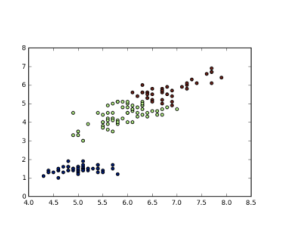



Get the x- and y- co-ordinates of each sample. 
* Sepal length is in the 0th column of the array, 
* while petal length is in the 2nd column. 

Now call the plt dot scatter function, passing the x- and y- co-ordinates and specifying c=labels to color by cluster label. 

```
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()
```

**Clustering 2D points**

Create a KMeans model to find 3 clusters, and fit it to the data points. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

* Import KMeans from sklearn.cluster.
* Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
* Use the .fit() method of model to fit the model to the array of points points.
* Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.

```
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)
```

```
<script.py> output:
    [1 2 0 1 2 1 2 2 2 0 1 2 2 0 0 2 0 0 2 2 0 2 1 2 1 0 2 0 0 1 1 2 2 2 0 1 2
     2 1 2 0 1 1 0 1 2 0 0 2 2 2 2 0 0 1 1 0 0 0 1 1 2 2 2 1 2 0 2 1 0 1 1 1 2
     1 0 0 1 2 0 1 0 1 2 0 2 0 1 2 2 2 1 2 2 1 0 0 0 0 1 2 1 0 0 1 1 2 1 0 0 1
     0 0 0 2 2 2 2 0 0 2 1 2 0 2 1 0 2 0 0 2 0 2 0 1 2 1 1 2 0 1 2 1 1 0 2 2 1
     0 1 0 2 1 0 0 1 0 2 2 0 2 0 0 2 2 1 2 2 0 1 0 1 1 2 1 2 2 1 1 0 1 1 1 0 2
     2 1 0 1 0 0 2 2 2 1 2 2 2 0 0 1 2 1 1 1 0 2 2 2 2 2 2 0 0 2 0 0 0 0 2 0 0
     2 2 1 0 1 1 0 1 0 1 0 2 2 0 2 2 2 0 1 1 0 2 2 0 2 0 0 2 0 0 1 0 1 1 1 2 0
     0 0 1 2 1 0 1 0 0 2 1 1 1 0 2 2 2 1 2 0 0 2 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0
     0 2 2 1]
```

> You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful.

**Inspect your clustering**

* Import matplotlib.pyplot as plt.
* Assign column 0 of new_points to xs, and column 1 of new_points to ys.
* Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
* Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
* Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
* Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

```
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=0.5)
plt.show()
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()
```

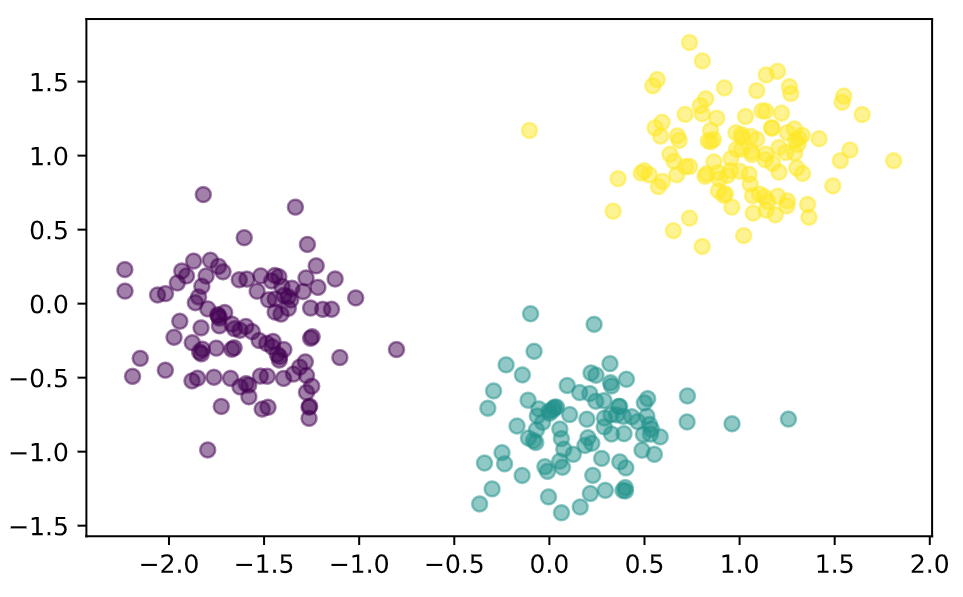

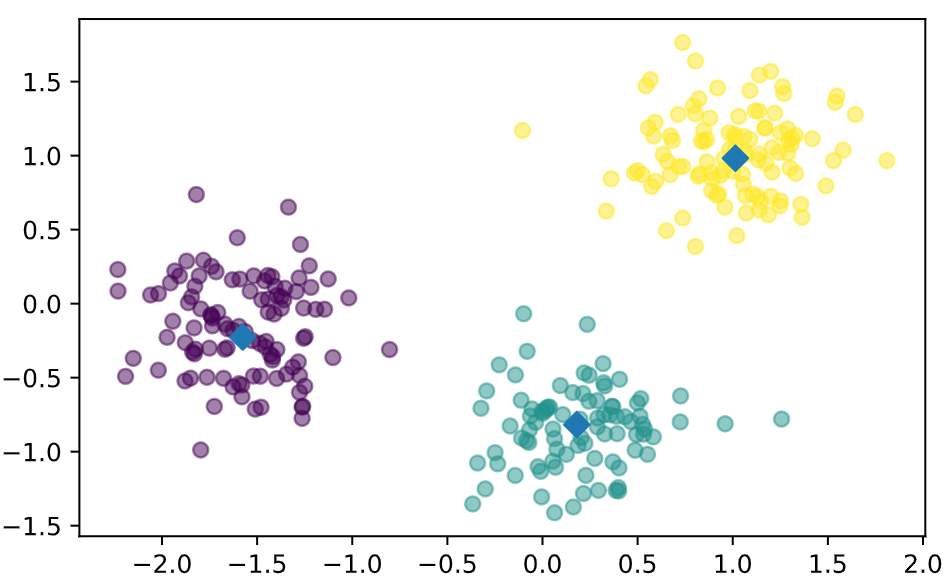

> The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?

###Evaluating a clustering

A direct approach is to compare the clusters with the iris species (in dataset).

Let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by this table. 

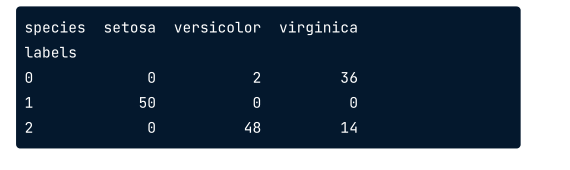

There is one column for each of the three species of iris: setosa, versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2.

The table shows the number of samples that have each possible cluster label/species combination.

> For example, we see that cluster 1 corresponds perfectly with the species setosa.

On the other hand, while cluster 0 contains mainly virginica samples, there are also some virginica samples in cluster 2.

Tables like these are called "cross-tabulations".

**Cross tabulation with pandas**

* Import pandas, and then create a two-column DataFrame, where the first column is cluster labels and the second column is the iris species, so that each row gives the cluster label and species of a single sample.

```
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)
```
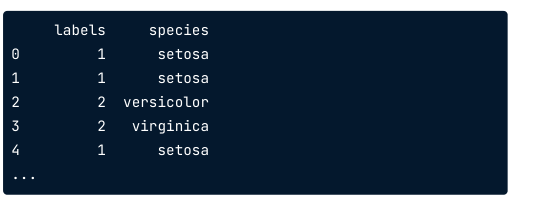


* use the pandas crosstab function to build the cross tabulation, passing the two columns of the DataFrame. 

```
ct = pd.crosstab(df['labels'], df['species'])
print(ct)
```

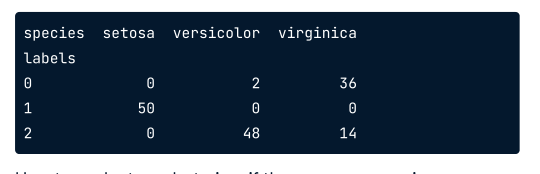

>Cross tabulations like these provide great insights into which sort of samples are in which cluster. But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases?

**Measuring clustering quality**
We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.

How spread out the samples within each cluster are can be measured by the "**inertia**". Inertia measures how far samples are from their centroids.

> We want clusters that are not spread out, so lower values of the inertia are better.

The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, **kmeans aims to place the clusters in a way that minimizes the inertia**.

```
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)
78.9408414261
```

Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters. 



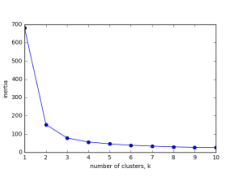

Our kmeans model with 3 clusters has relatively low inertia, which is great. 

> But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

* A good clustering has tight clusters (so low inertia)
* ... but not too many clusters!
* Choose an "elbow" in the inertia plot
* Where inertia begins to decrease more slowly
* E.g., for iris dataset, 3 is a good choice

**How many clusters of grain?**

ou are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

* For each of the given values of k, perform the following steps:
* Create a KMeans instance called model with k clusters.
* Fit the model to the grain data samples.
* Append the value of the inertia_ attribute of model to the list inertias.

```
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
```

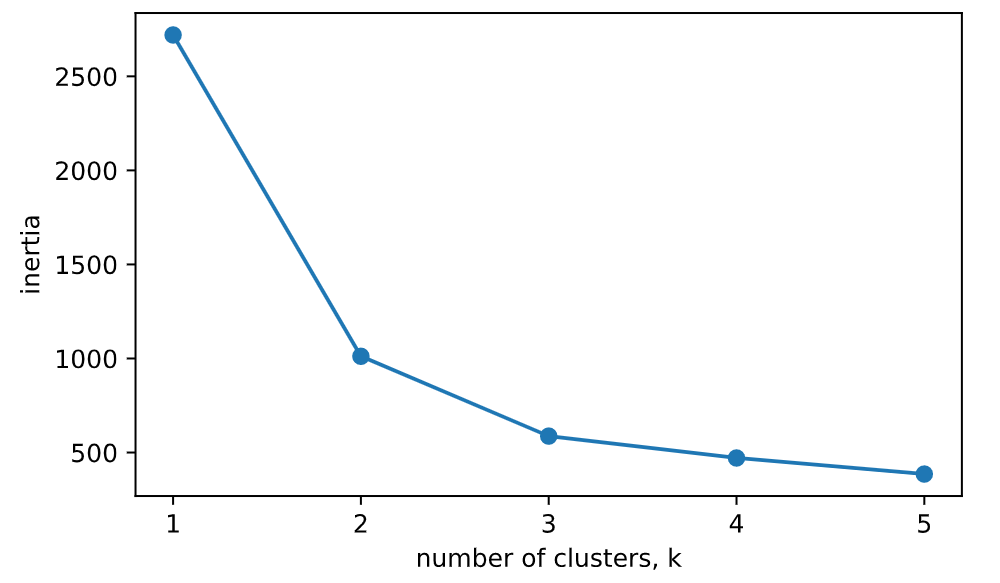

>  The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

**Evaluating the grain clustering**

Cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. 

* Create a KMeans model called model with 3 clusters.
* Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
* Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
* Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.

```
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

```
<script.py> output:
    varieties  Canadian wheat  Kama wheat  Rosa wheat
    labels                                           
    0                       0           1          60
    1                      68           9           0
    2                       2          60          10
```

> The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. 

Is there anything you can do in such situations to improve your clustering?

###Transforming features for better clusterings

Let's take the array of samples and use KMeans to find 3 clusters.

There are three varieties of wine, so let's use pandas crosstab to check the cluster label - wine variety correspondence. 

```
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

df = pd.DataFrame({'labels': labels,
'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
```

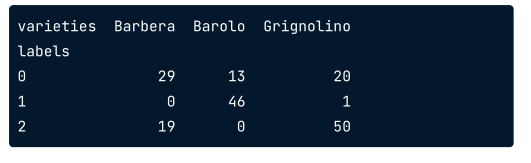
> The KMeans clusters don't correspond well with the wine varieties.



The problem is that the features of the wine dataset have very different variances. The variance of a feature measures the spread of its values. 

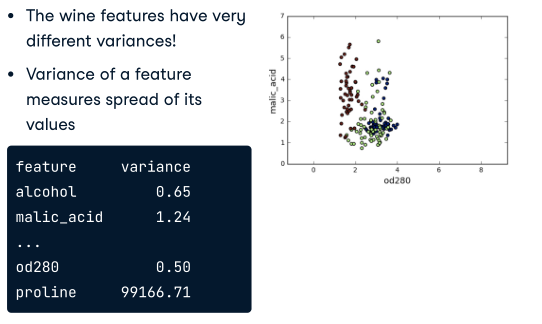
> For example, the malic acid feature has a higher variance than the od280 feature, and this can also be seen in their scatter plot. 

> The differences in some of the feature variances is enormous, as seen here, for example, in the scatter plot of the od280 and proline features.

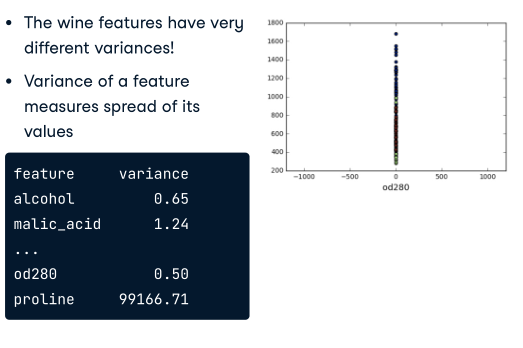

**StandardScaler**

In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm.

> To give every feature a chance, the data needs to be transformed so that features have equal variance. 

 This can be achieved with the **StandardScaler**. *It transforms every feature to have mean 0 and variance 1.*

 The resulting "standardized" features can be very informative. Using standardized od280 and proline, for example, the three wine varieties are much more distinct.

 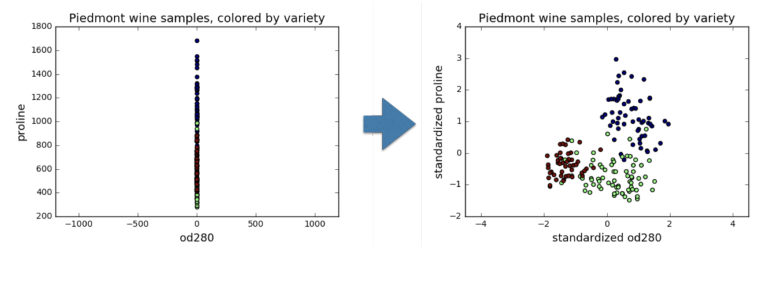

Let's see the StandardScaler in action

* import StandardScaler from sklearn.preprocessing.
```
from sklearn.preprocessing import StandardScaler
```

* create a StandardScaler object, and fit it to the samples.

```
scaler = StandardScaler()
scaler.fit(samples)
```

*  The transform method can now be used to standardize any samples, either the same ones, or completely new ones.

```
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)
```

The APIs of StandardScaler and KMeans are similar, but there is an important difference. 

* **StandardScaler transforms data, and so has a transform method.**
* **KMeans, in contrast, assigns cluster labels to samples, and this done using the predict method.**

**StandardScaler, then KMeans in a pipeline**

We need to perform two steps. Firstly, to standardize the data using StandardScaler, and secondly to take the standardized data and cluster it using KMeans.

> This can be conveniently achieved by combining the two steps using a scikit-learn pipeline.

* creating a StandardScaler and a KMeans object.

```
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
```

*  import the make_pipeline function from sklearn.pipeline. Apply the make_pipeline function to the steps that you want to compose in this case, the scaler and the kmeans objects. 

```
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
```

* use the fit method of the pipeline to fit both the scaler and kmeans, and use its predict method to obtain the cluster labels.

```
pipeline.fit(samples)
Pipeline(steps=...)
labels = pipeline.predict(samples)
```
**Feature standardization improves clustering**

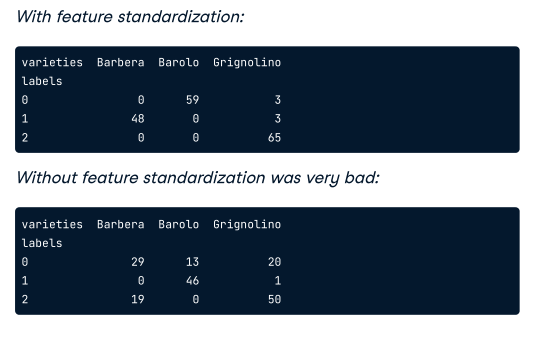
Checking the correspondence between the cluster labels and the wine varieties reveals that this new clustering, incorporating standardization. Its three clusters correspond almost exactly to the three wine varieties. This is a huge improvement on the clustering without standardization.


> StandardScaler is an example of a "preprocessing" step. There are several of these available in scikit-learn, for example MaxAbsScaler and Normalizer.

**Scaling fish data for clustering**

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

* Import:
  * make_pipeline from sklearn.pipeline.
  * StandardScaler from sklearn.preprocessing.
  * KMeans from sklearn.cluster.
* Create an instance of StandardScaler called scaler.
* Create an instance of KMeans with 4 clusters called kmeans.
* Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().

```
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
```

**Clustering the fish data**

Use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements.

* Import pandas as pd.
* Fit the pipeline to the fish measurements samples.
* Obtain the cluster labels for samples by using the .predict() method of pipeline.
* Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
* Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].

```
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)
```

```
<script.py> output:
    species  Bream  Pike  Roach  Smelt
    labels                            
    0            0     0      0     13
    1           33     0      1      0
    2            0    17      0      0
    3            1     0     19      1
```

>  It looks like the fish data separates really well into 4 clusters!

**Clustering stocks using KMeans**

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, **Normalizer()** *rescales each sample - here, each company's stock price - independently of the other.*

* Import Normalizer from sklearn.preprocessing.
* Create an instance of Normalizer called normalizer.
* Create an instance of KMeans called kmeans with 10 clusters.
* Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
* Fit the pipeline to the movements array.

```
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
```

> Now that your pipeline has been set up, you can find out which stocks move together.

**Which stocks move together?**

So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

 In addition, a list companies of the company names is available.

 *Import pandas as pd.
* Use the .predict() method of the pipeline to predict the labels for movements.
* Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
* Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.

```
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))
```

```
<script.py> output:
        labels                           companies
    59       0                               Yahoo
    15       0                                Ford
    35       0                            Navistar
    26       1                      JPMorgan Chase
    16       1                   General Electrics
    58       1                               Xerox
    11       1                               Cisco
    18       1                       Goldman Sachs
    20       1                          Home Depot
    5        1                     Bank of America
    3        1                    American express
    55       1                         Wells Fargo
    1        1                                 AIG
    38       2                               Pepsi
    40       2                      Procter Gamble
    28       2                           Coca Cola
    27       2                      Kimberly-Clark
    9        2                   Colgate-Palmolive
    54       3                            Walgreen
    36       3                    Northrop Grumman
    29       3                     Lookheed Martin
    4        3                              Boeing
    0        4                               Apple
    47       4                            Symantec
    33       4                           Microsoft
    32       4                                  3M
    31       4                           McDonalds
    30       4                          MasterCard
    50       4  Taiwan Semiconductor Manufacturing
    14       4                                Dell
    17       4                     Google/Alphabet
    24       4                               Intel
    23       4                                 IBM
    2        4                              Amazon
    51       4                   Texas instruments
    43       4                                 SAP
    45       5                                Sony
    48       5                              Toyota
    21       5                               Honda
    22       5                                  HP
    34       5                          Mitsubishi
    7        5                               Canon
    56       6                            Wal-Mart
    57       7                               Exxon
    44       7                        Schlumberger
    8        7                         Caterpillar
    10       7                      ConocoPhillips
    12       7                             Chevron
    13       7                   DuPont de Nemours
    53       7                       Valero Energy
    39       8                              Pfizer
    41       8                       Philip Morris
    25       8                   Johnson & Johnson
    49       9                               Total
    46       9                      Sanofi-Aventis
    37       9                            Novartis
    42       9                   Royal Dutch Shell
    19       9                     GlaxoSmithKline
    52       9                            Unilever
    6        9            British American Tobacco
```



##Visualization with hierarchical clustering and t-SNE

Hierarchical clustering arranges samples into a hierarchy of clusters, and can organize any sort of data into a hierarchy. 

Let's consider a new type of dataset, describing how countries scored performances at the Eurovision 2016 song contest. The data is arranged in a rectangular array, where the rows of the array show how many points a country gave to each song. 

> The "samples" in this case are the countries.

The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a "dendrogram". This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision.

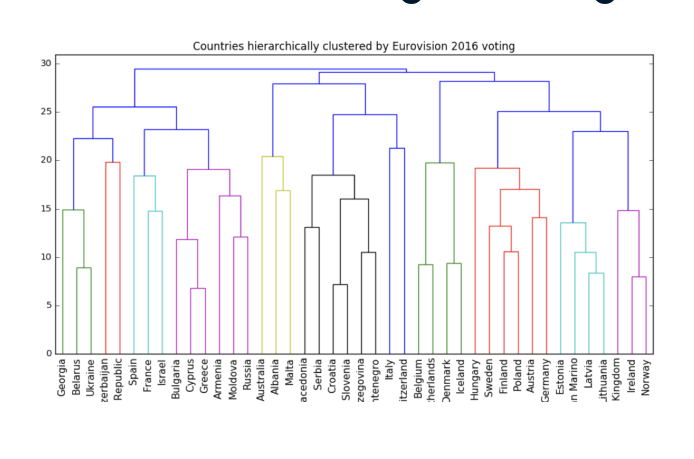

The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another geographically, or that have close cultural or political ties, or that belong to single language group.

Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries!

> At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries. 

! there is also "divisive clustering", which works the other way around.

**Hierarchical clustering with SciPy**

> We'll use functions from scipy to perform a hierarchical clustering on the array of scores.

For the dendrogram, we'll also need a list of country names. 

* import the linkage and dendrogram functions. Then, apply the linkage function to the sample array.

```
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
```

> **Its the linkage function that performs the hierarchical clustering.** 

* pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter. 

```
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,
leaf_font_size=6)
plt.show()
```


**Hierarchical clustering of the grain data**

Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

* Import:
  * linkage and dendrogram from scipy.cluster.hierarchy.
  * matplotlib.pyplot as plt.
* Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.
* Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

```
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
```

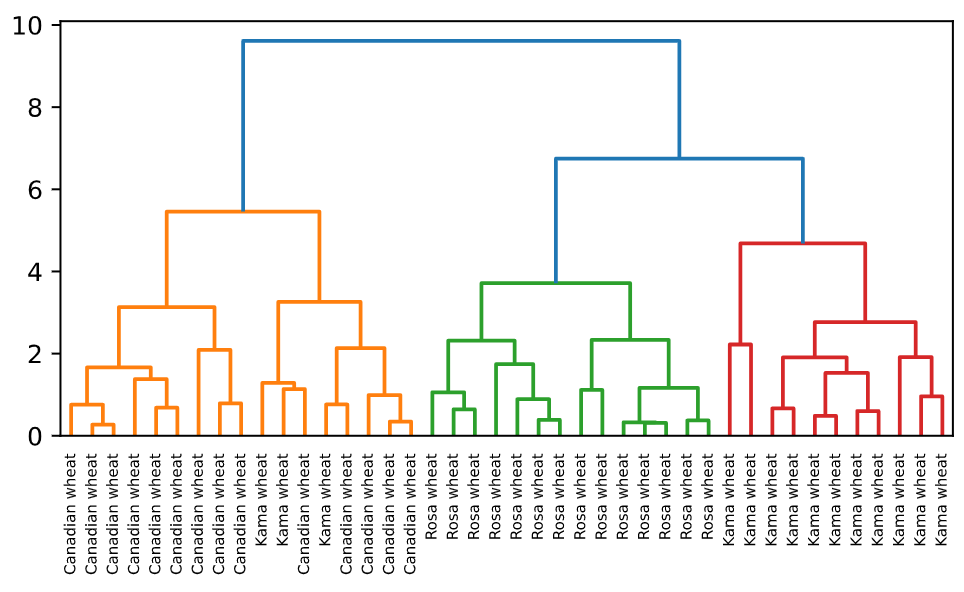


**Hierarchies of stocks**

 you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

 * Import normalize from sklearn.preprocessing.
* Rescale the price movements for each stock by using the normalize() function on movements.
* Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.

```
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

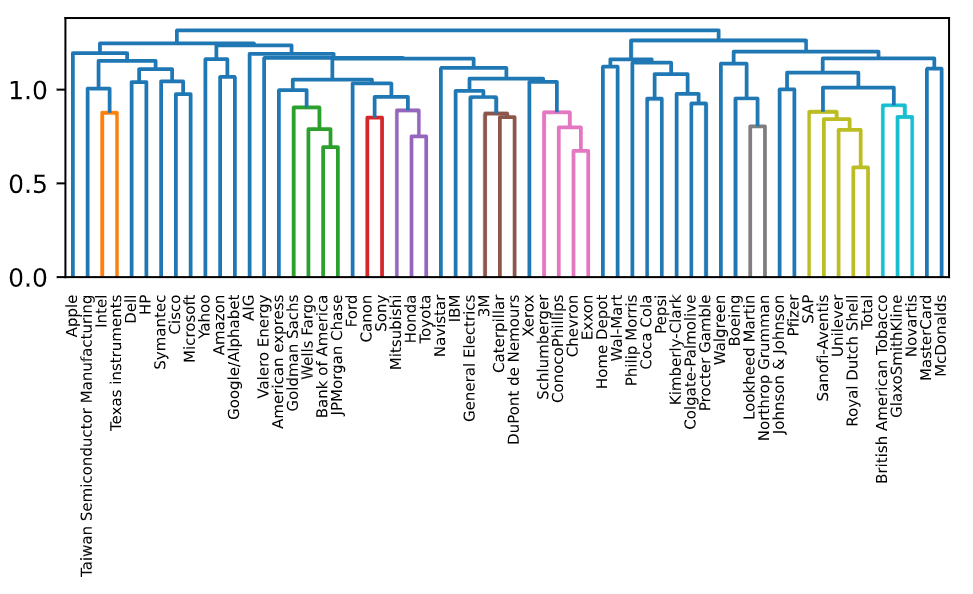

> You can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

###Cluster labels in hierarchical clustering

The **cluster labels** for these intermediate clusterings **can then be used in further computations, such as cross tabulations**, just like the cluster labels from k-means.

> An intermediate stage in the hierarchical clustering is specified by *choosing a height on the dendrogram*.

For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own. 

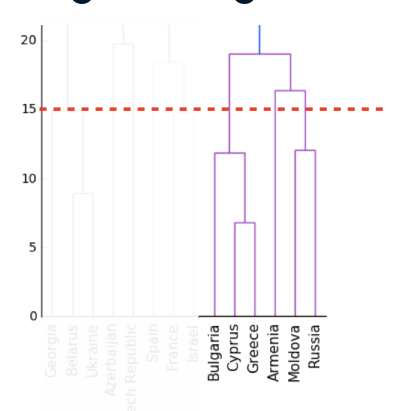



The y-axis of the dendrogram encodes the distance between merging clusters.

So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the **hierarchical clustering should stop merging clusters when all clusters are at least this far apart**.

> The distance between two clusters is measured using a "linkage method".

*In our example, we used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples.*

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function.

**Extracting cluster labels using fcluster**

* After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries.

```
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)
[ 9 8 11 20 2 1 17 14 ... ]
```

* To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result.

```
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))
```

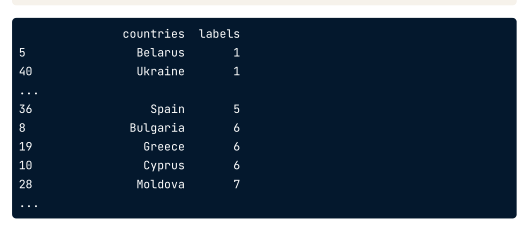

As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the **scipy cluster labels start at 1, not at 0 like they do in scikit-learn**.

>  In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

**Different linkage, different hierarchical clustering!**

Perform a hierarchical clustering of the voting countries with 'single' linkage.

 You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. 


* Import linkage and dendrogram from scipy.cluster.hierarchy.
* Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
* Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.

```
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

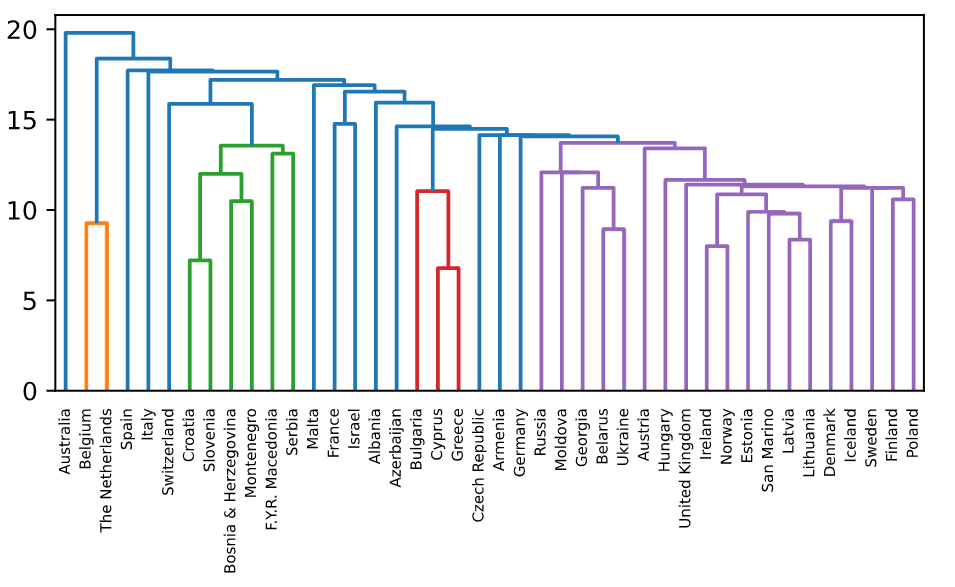



>  As you can see, performing single linkage hierarchical clustering produces a different dendrogram!

**Extracting the cluster labels**

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

* Import:
  * pandas as pd.
  * fcluster from scipy.cluster.hierarchy.
* Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
* Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
* Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

```
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

```
<script.py> output:
    varieties  Canadian wheat  Kama wheat  Rosa wheat
    labels                                           
    1                      14           3           0
    2                       0           0          14
    3                       0          11           0
```

###t-SNE for 2-dimensional maps

t-SNE stands for "**t-distributed stochastic neighbor embedding**". 

>  It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized.

While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. 

The iris samples are in a four dimensional space, where each dimension corresponds to one of the four iris measurements, such as petal length and petal width. 

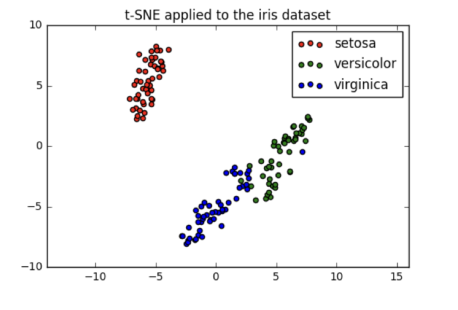

> We learn that there are two iris species, versicolor and virginica, whose samples are close together in space. So it could happen that the iris dataset appears to have two clusters, instead of three. 

*This is compatible with our previous examples using k-means, where we saw that a clustering with 2 clusters also had relatively low inertia, meaning tight clusters.*

**t-SNE in sklearn**

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components you've already met. 

 The samples are in a 2-dimensional numpy array, and there is a list giving the species of each sample.

 *  import TSNE and create a TSNE object. Apply the fit_transform method to the samples, and then make a scatter plot of the result, coloring the points using the species.

 ```
 import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()
```
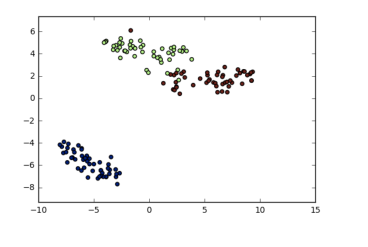


> There are two aspects that deserve special attention: the fit_transform method, and the learning rate.

**t-SNE has only fit_transform()**

The fit_transform method simultaneously fits the model and transforms the data. 

t-SNE does not have separate fit and transform methods. This means that **you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.**

**t-SNE learning rate** The learning rate makes the use of t-SNE more complicated than some other techniques. 

You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. 

>  Normally it's enough to try a few values between 50 and 200.

**Different every time**

 t-SNE plot do not have any interpretable meaning.

 *In fact, they are different every time t-SNE is applied, even on the same data.*

 **t-SNE visualization of grain dataset**

In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=200.
* Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
* Select the column 0 of tsne_features. Assign the result to xs.
* Select the column 1 of tsne_features. Assign the result to ys.
* Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()
```

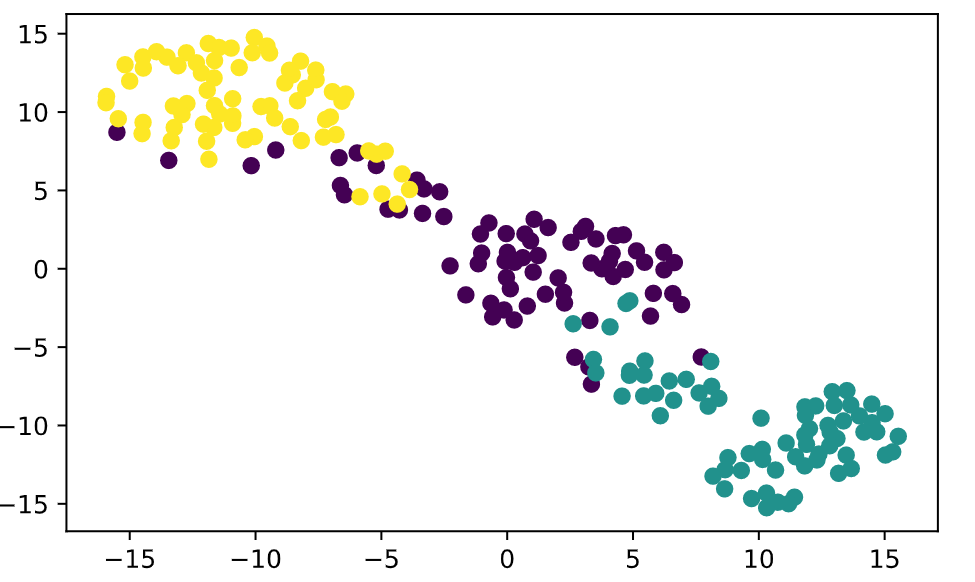


> As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data?

**A t-SNE map of the stock market**

*t-SNE provides great visualizations when the individual samples can be labeled.*

In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. 

* Import TSNE from sklearn.manifold.
* Create a TSNE instance called model with learning_rate=50.
* Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
* Select column 0 and column 1 of tsne_features.
* Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.

```
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
```

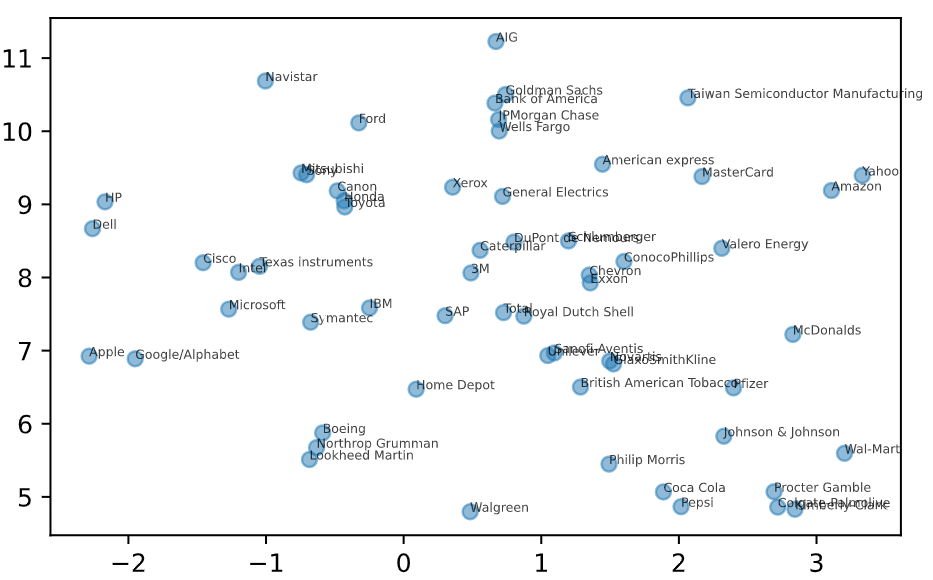

##Decorrelating your data and dimension reduction

###Visualizing the PCA transformation


**Dimension reduction**

*Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form.*

> This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets.

*The most important function of dimension reduction* is to reduce a dataset to its "bare bones", **discarding noisy features** that cause big problems for supervised learning tasks like regression and classification.

**Principal Component Analysis** *Fundamental dimension reduction technique*

PCA performs dimension reduction in two steps, and the first one, called "de-correlation", doesn't change the dimension of the data at all. 

> In this first step, PCA rotates the samples so that they are aligned with the coordinate axes.

* PCA also shifts the samples so that they have mean zero.

These scatter plots show the effect of PCA applied to two features of the wine dataset.

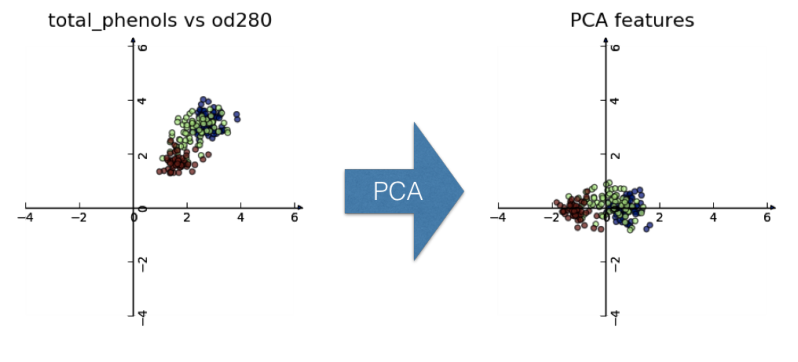




 Notice that no information is lost - this is true no matter how many features your dataset has.

 **Using scikit-learn PCA**

 scikit-learn has an implementation of PCA, and it has fit and transform methods just like StandardScaler. 
 
 * The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. 
 * The transform method, on the other hand, applies the transformation that fit learned. 
 
 > In particular, the transform method can be applied to new, unseen samples.

**PCA implementation**

 * import PCA. Now create a PCA object, and fit it to the samples. Then use the fit PCA object to transform the samples. This returns a new array of transformed samples.

 ```
 from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
```
```
PCA(copy=True, ...)
```
```
transformed = model.transform(samples)
```

* This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

```
print(transformed)
```
```
[[ 1.32771994e+00 4.51396070e-01]
[ 8.32496068e-01 2.33099664e-01]
...
[ -9.33526935e-01 -4.60559297e-01]]
```

**PCA features are not correlated**

It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, **PCA, due to the rotation it performs, "de-correlates" the data**, in the sense that the *columns of the transformed array are not linearly correlated*.

Pearson correlation

> Linear correlation can be measured with the Pearson correlation. 

 It takes values between -1 and 1, 
 * where larger values indicate a stronger correlation, 
 * and 0 indicates no linear correlation.

 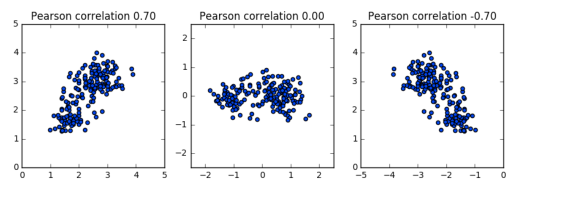 


Principal components

PCA is called "principal component analysis" because it **learns the "principal components" of the data**. 

> These are the directions in which the samples vary the most, depicted here in red. 

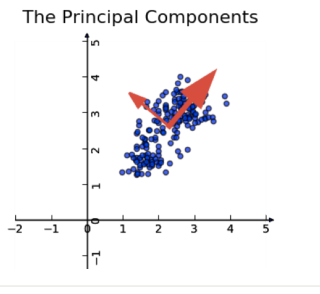

 It is the principal components that PCA aligns with the coordinate axes.

 After a PCA model has been fit, the principal components are available as the components attribute. This is numpy array with one row for each principal component.

 ```
 print(model.components_)
[[ 0.64116665 0.76740167]
[-0.76740167 0.64116665]]
```

**Correlated data in nature**

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

* Import:
  * matplotlib.pyplot as plt.
  * pearsonr from scipy.stats.
* Assign column 0 of grains to width and column 1 of grains to length.
* Make a scatter plot with width on the x-axis and length on the y-axis.
* Use the pearsonr() function to calculate the Pearson correlation of width and length

```
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)
```

```
0.8604149377143466
```

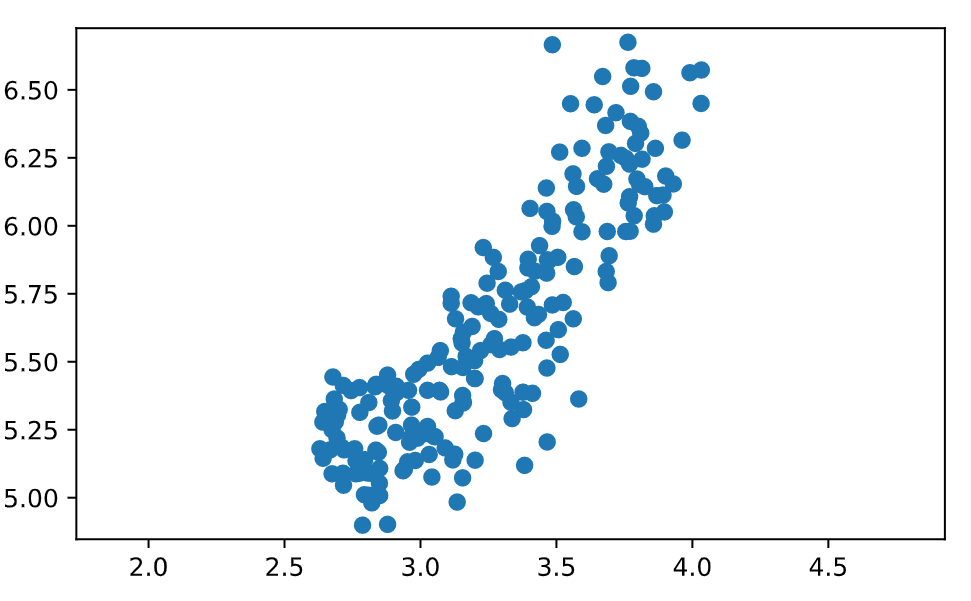

> As you would expect, the width and length of the grain samples are highly correlated.

**Decorrelating the grain measurements with PCA**

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

* Import PCA from sklearn.decomposition.
* Create an instance of PCA called model.
* Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.

```
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)
```

```
2.5478751053409354e-17
```

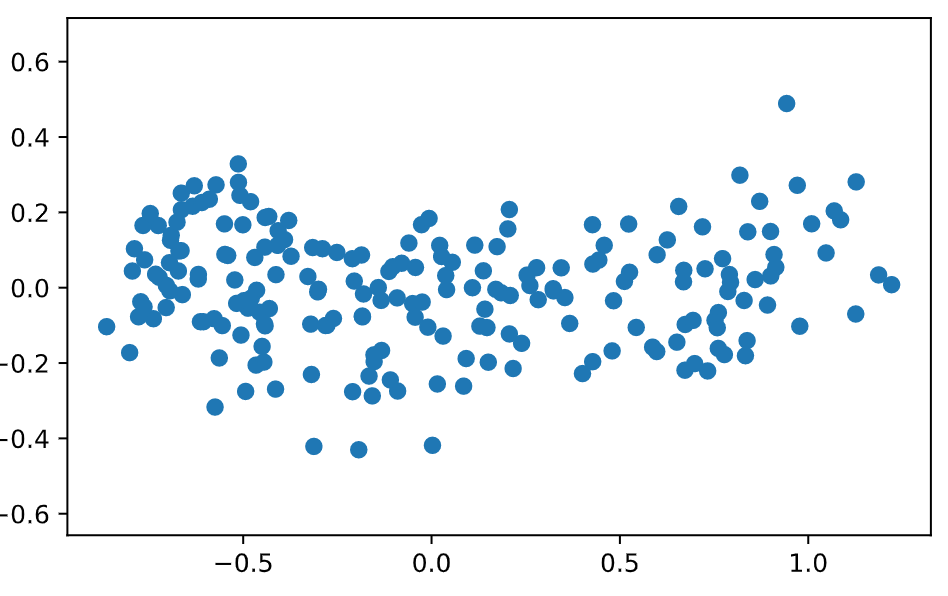

**Intrinsic dimension**

Consider this dataset with 2 features: latitude and longitude. 
> These two features might track the flight of an airplane, for example. 

This dataset is 2-dimensional, yet it turns out that it can be closely approximated using only one feature: the displacement along the flight path. This dataset is intrinsically one-dimensional.

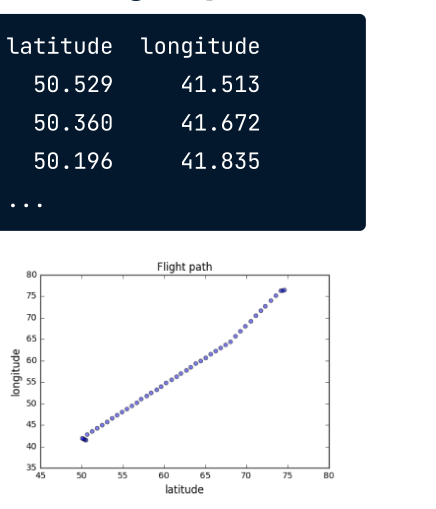

> The intrinsic dimension of a dataset is the number of features required to approximate it. 

*The intrinsic dimension informs dimension reduction, because it tells us **how much a dataset can be compressed**.*

To better illustrate the intrinsic dimension, let's consider an example dataset containing only some of the samples from the iris dataset. Specifically, let's take three measurements from the iris versicolor samples: sepal length, sepal width, and petal width. So each sample is represented as a point in 3-dimensional space.

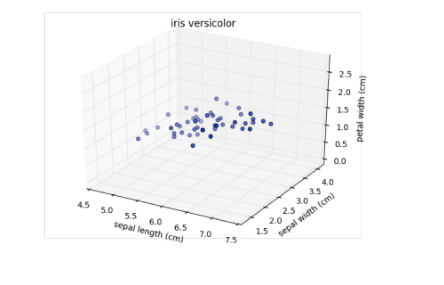





However, if we make a 3d scatter plot of the samples, we see that they all lie very close to a flat, 2-dimensional sheet. This means that the data can be approximated by using only two coordinates, without losing much information. **So this dataset has intrinsic dimension 2**.

**PCA identifies intrinsic dimension**

But scatter plots are only possible if there are 3 features or less. *So how can the intrinsic dimension be identified, even if there are many features?* 
> This is where PCA is really helpful.

PCA rotates and shifts the samples to align them with the coordinate axes. This expresses the samples using three PCA features.

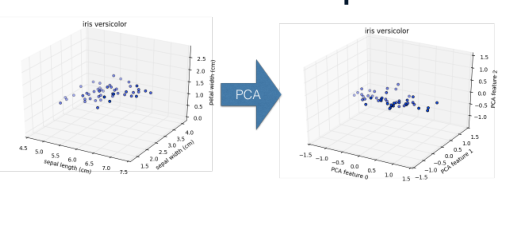



The PCA features are in a special order. Here is a bar graph showing the variance of each of the PCA features.

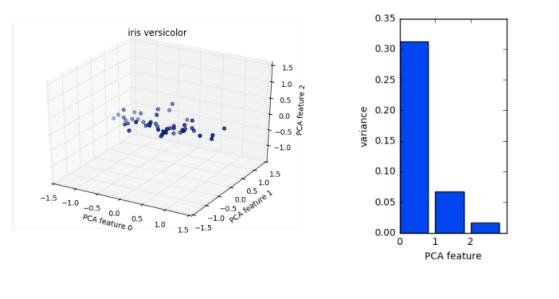

As you can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.

The intrinsic dimension is the number of PCA features that have significant variance. In our example, only the first two PCA features have significant variance. So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot.

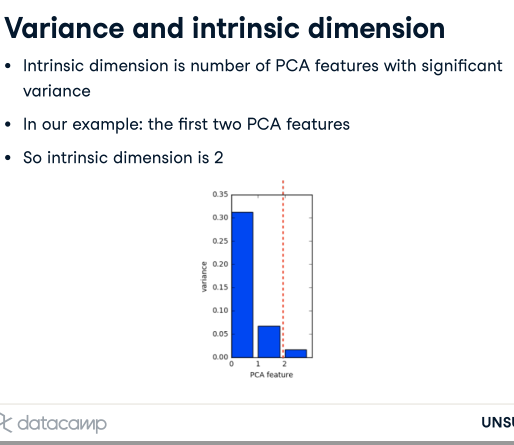

**Plotting the variances of PCA features**

* make the necessary imports. Then create a PCA model, and fit it to the samples. Now create a range enumerating the PCA features,

```
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
PCA(copy=True, ... )
features = range(pca.n_components_)
```

* and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.

```
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
```
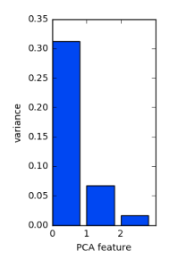

**Intrinsic dimension can be ambiguous**

The intrinsic dimension is a useful idea that helps to guide dimension reduction. However, it is not always unambiguous. Here is a graph of the variances of the PCA features for the wine dataset. We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold you chose.

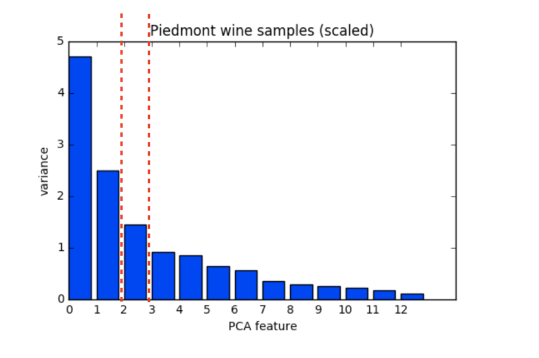

**The first principal component**

> The first principal component of the data is the direction in which the data varies the most.

In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

* Make a scatter plot of the grain measurements. 
* Create a PCA instance called model.
* Fit the model to the grains data.
* Extract the coordinates of the mean of the data using the .mean_ attribute of model.
* Get the first principal component of model using the .components_[0,:] attribute.
* Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

```
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()
```

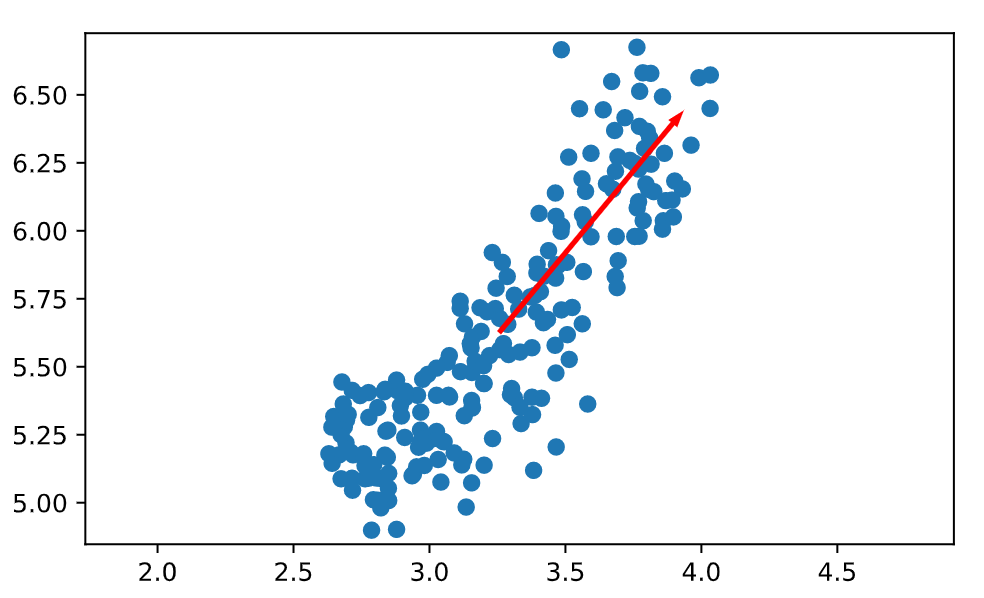

> This is the direction in which the grain data varies the most.

**Variance of the PCA features**

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

* Create an instance of StandardScaler called scaler.
* Create a PCA instance called pca.
* Use the make_pipeline() function to create a pipeline chaining scaler and pca.
* Use the .fit() method of pipeline to fit it to the fish samples samples.
* Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
* Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.

```
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
```

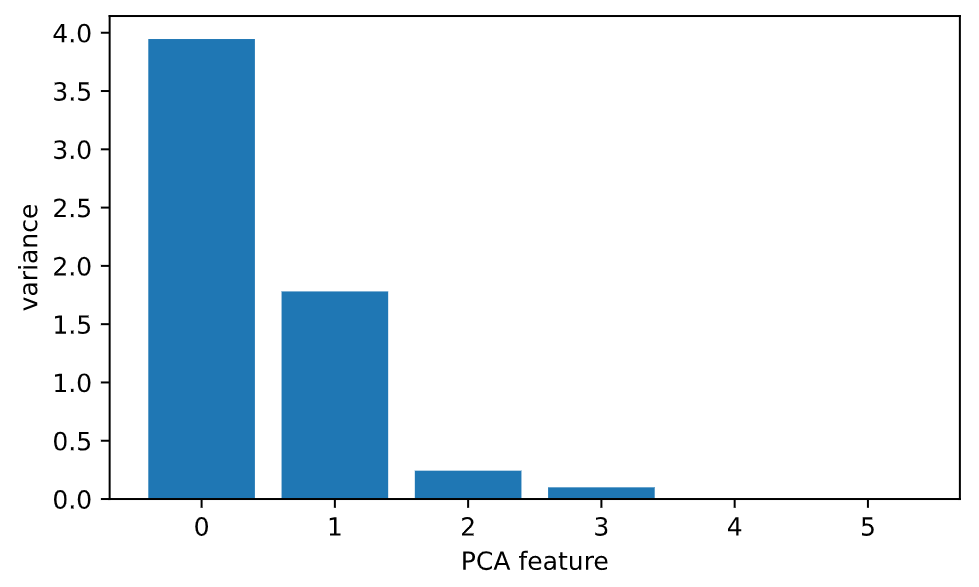

> It looks like PCA features 0 and 1 have significant variance.

###Dimension reduction with PCA

*Dimension reduction represents the same data using less features and is vital for building machine learning pipelines using real-world data.*

* PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, 
* and retaining the higher variance PCA features, which it assumes to be informative.
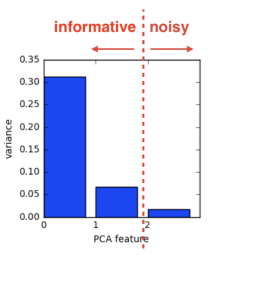
To use PCA for dimension reduction, you need to specify how many PCA features to keep. 

> For example, specifying n_components=2 when creating a PCA model tells it to keep only the first two PCA features. A good choice is the intrinsic dimension of the dataset, if you know it. 

**Dimension reduction of iris dataset**

The iris dataset has 4 features representing the 4 measurements.

> Here, the measurements are in a numpy array called samples. Let's use PCA to reduce the dimension of the iris dataset to only 2. 

* begin by importing PCA as usual. Create a PCA model specifying n_components=2, and then fit the model and transform the samples as usual. Printing the shape of the transformed samples, we see that there are only two features, as expected.

```
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
PCA(copy=True, ... )
transformed = pca.transform(samples)
print(transformed.shape)
(150, 2)
```

Here is a scatterplot of the two PCA features, where the colors represent the three species of iris. 

```
import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()
```

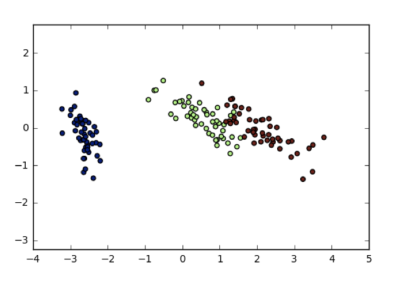

Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished.

> Remember that PCA didn't even know that there were distinct species. PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative.

**PCA discards the low variance features, and assumes that the higher variance features are informative.** *Like all assumptions, there are cases where this doesn't hold.* As we saw with the iris dataset, however, it often does in practice.

**Word frequency arrays**

In some cases, an alternative implementation of PCA needs to be used. 

Word frequency arrays are a great example. In a word-frequency array, each row corresponds to a document, and each column corresponds to a word from a fixed vocabulary. The entries of the word-frequency array measure how often each word appears in each document. Only some of the words from the vocabulary appear in any one document, so most entries of the word frequency array are zero.

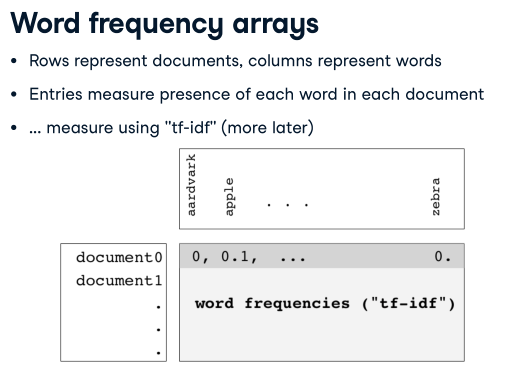

Sparse arrays and csr_matrix

Arrays like this are said to be "sparse", and are often represented using a special type of array called a "csr_matrix". **csr_matrices save space by remembering only the non-zero entries of the array.**

* scipy.sparse.csr_matrix instead of NumPy array
* csr_matrix remembers only the non-zero entries (saves
space!)

**TruncatedSVD and csr_matrix**

Scikit-learn's PCA doesn't support csr_matrices, and you'll need to use TruncatedSVD instead. TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input. Other than that, you interact with TruncatedSVD and PCA in exactly the same way.

* scikit-learn PCA doesn't support csr_matrix
* Use scikit-learn TruncatedSVD instead
* Performs same transformation
```
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=3)
model.fit(documents) # documents is csr_matrix
TruncatedSVD(algorithm='randomized', ... )
transformed = model.transform(documents)
```


**Dimension reduction of the fish measurements**

Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

* Import PCA from sklearn.decomposition.
* Create a PCA instance called pca with n_components=2.
* Use the .fit() method of pca to fit it to the scaled fish measurements scaled_samples.
* Use the .transform() method of pca to transform the scaled_samples. Assign the result to pca_features.

```
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)
```

```
 (85, 2)
```
> You've successfully reduced the dimensionality from 6 to 2.
**A tf-idf word-frequency array**

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

* Import TfidfVectorizer from sklearn.feature_extraction.text.
* Create a TfidfVectorizer instance called tfidf.
* Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
* Inspect csr_mat by calling its .toarray() method and printing the result. 
* The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

```
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)
```
```
    [[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
     [0.         0.         0.51785612 0.         0.51785612 0.68091856]
     [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
    ['cats', 'chase', 'dogs', 'meow', 'say', 'woof']
```

**Clustering Wikipedia part I**

Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

* Import:
  * TruncatedSVD from sklearn.decomposition.
  * KMeans from sklearn.cluster.
  * make_pipeline from sklearn.pipeline.
* Create a TruncatedSVD instance called svd with n_components=50.
* Create a KMeans instance called kmeans with n_clusters=6.
* Create a pipeline called pipeline consisting of svd and kmeans.

```
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
```

**Clustering Wikipedia part II**

You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

* Import pandas as pd.
* Fit the pipeline to the word-frequency array articles.
* Predict the cluster labels.
* Align the cluster labels with the list titles of article titles by creating a DataFrame df with labels and titles as columns. This has been done for you.
Use the .sort_values() method of df to sort the DataFrame by the 'label' column, and print the result.

```
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))
```

```
<script.py> output:
        label                                        article
    59      0                                    Adam Levine
    57      0                          Red Hot Chili Peppers
    56      0                                       Skrillex
    55      0                                  Black Sabbath
    54      0                                 Arctic Monkeys
    53      0                                   Stevie Nicks
    52      0                                     The Wanted
    51      0                                     Nate Ruess
    50      0                                   Chad Kroeger
    58      0                                         Sepsis
    30      1                  France national football team
    31      1                              Cristiano Ronaldo
    32      1                                   Arsenal F.C.
    33      1                                 Radamel Falcao
    37      1                                       Football
    35      1                Colombia national football team
    36      1              2014 FIFA World Cup qualification
    38      1                                         Neymar
    39      1                                  Franck Ribéry
    34      1                             Zlatan Ibrahimović
    26      2                                     Mila Kunis
    28      2                                  Anne Hathaway
    27      2                                 Dakota Fanning
    25      2                                  Russell Crowe
    29      2                               Jennifer Aniston
    23      2                           Catherine Zeta-Jones
    22      2                              Denzel Washington
    21      2                             Michael Fassbender
    20      2                                 Angelina Jolie
    24      2                                   Jessica Biel
    10      3                                 Global warming
    11      3       Nationally Appropriate Mitigation Action
    13      3                               Connie Hedegaard
    14      3                                 Climate change
    12      3                                   Nigel Lawson
    16      3                                        350.org
    17      3  Greenhouse gas emissions by the United States
    18      3  2010 United Nations Climate Change Conference
    19      3  2007 United Nations Climate Change Conference
    15      3                                 Kyoto Protocol
    8       4                                        Firefox
    1       4                                 Alexa Internet
    2       4                              Internet Explorer
    3       4                                    HTTP cookie
    4       4                                  Google Search
    5       4                                         Tumblr
    6       4                    Hypertext Transfer Protocol
    7       4                                  Social search
    49      4                                       Lymphoma
    42      4                                    Doxycycline
    47      4                                          Fever
    46      4                                     Prednisone
    44      4                                           Gout
    43      4                                       Leukemia
    9       4                                       LinkedIn
    48      4                                     Gabapentin
    0       4                                       HTTP 404
    45      5                                    Hepatitis C
    41      5                                    Hepatitis B
    40      5                                    Tonsillitis
```



##Discovering interpretable features

###Non-negative matrix factorization (NMF) 

NMF, like PCA, is a dimension reduction technique. 

>  In constrast to PCA, however, NMF models are interpretable.


**NMF models are easier to understand yourself, and much easier for you to explain to others**.  NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0.

> NMF achieves its interpretability by decomposing samples as sums of their parts.

For example, NMF decomposes documents as combinations of common themes, and images as combinations of common patterns. 



**Example word-frequency array**

In this toy dataset, there are only 4 words in the vocabulary, and these correspond to the four columns of the word-frequency array. Each row represents a document, and the entries of the array measure the frequency of each word in the document using what's known as "tf-idf". "tf" is the frequency of the word in the document. So if 10% of the words in the document are "datacamp", then the tf of "datacamp" for that document is point-1. "idf" is a weighting scheme that reduces the influence of frequent words like "the".

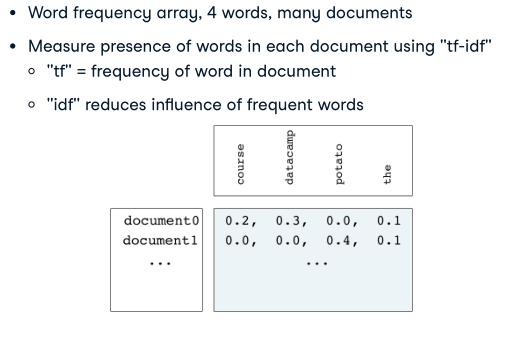

**Using scikit-learn NMF**

NMF is available in scikit learn, and follows the same fit/transform pattern as PCA.

*unlike PCA, the desired number of components must always be specified.*


NMF works both with numpy arrays and sparse arrays in the csr_matrix format.


*  import NMF. Create a model, specifying the desired number of components. Let's specify 2. Fit the model to the samples, then use the fit model to perform the transformation.

```
from sklearn.decomposition import NMF
model = NMF(n_components=2)
model.fit(samples)
NMF(alpha=0.0, ... )
nmf_features = model.transform(samples)
```



**NMF components**

Just as PCA has principal components, **NMF has components which it learns from the samples**, and as with PCA, **the dimension of the components is the same as the dimension of the samples**. In our example, for instance, there are 2 components, and they live in 4 dimensional space, corresponding to the 4 words in the vocabulary. **The entries of the NMF components are always non-negative**.

**NMF features**

> The NMF feature values are non-negative, as well. 

The features and the components of an NMF model can be combined to approximately reconstruct the original data samples. 

Reconstruction of a sample

Here is a sample representing a document from our toy dataset, and here are its NMF feature values. 

```
print(samples[i,:])
[ 0.12 0.18 0.32 0.14]
print(nmf_features[i,:])
[ 0.15 0.12]
```

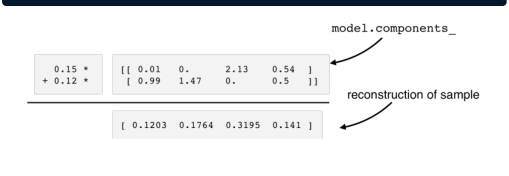

> if we multiply each NMF components by the corresponding NMF feature value, and add up each column, we get something very close to the original sample.

**NMF applied to Wikipedia articles**

Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles. In the next exercise, you'll explore the result.

* Import NMF from sklearn.decomposition.
* Create an NMF instance called model with 6 components.
* Fit the model to the word count data articles.
* Use the .transform() method of model to transform articles, and assign the result to nmf_features.
* Print nmf_features to get a first idea what it looks like (.round(2) rounds the entries to 2 decimal places.)

```
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))
```

```
    [[0.   0.   0.   0.   0.   0.44]
     [0.   0.   0.   0.   0.   0.57]
     [0.   0.   0.   0.   0.   0.4 ]
     [0.   0.   0.   0.   0.   0.38]
     [0.   0.   0.   0.   0.   0.49]
     [0.01 0.01 0.01 0.03 0.   0.33]
     [0.   0.   0.02 0.   0.01 0.36]
     [0.   0.   0.   0.   0.   0.49]
     [0.02 0.01 0.   0.02 0.03 0.48]
     [0.01 0.03 0.03 0.07 0.02 0.34]
     [0.   0.   0.53 0.   0.03 0.  ]
     [0.   0.   0.36 0.   0.   0.  ]
     [0.01 0.01 0.31 0.06 0.01 0.02]
     [0.   0.01 0.34 0.01 0.   0.  ]
     [0.   0.   0.43 0.   0.04 0.  ]
     [0.   0.   0.48 0.   0.   0.  ]
     [0.01 0.02 0.38 0.03 0.   0.01]
     [0.   0.   0.48 0.   0.   0.  ]
     [0.   0.01 0.55 0.   0.   0.  ]
     [0.   0.   0.47 0.   0.   0.  ]
     [0.   0.01 0.02 0.52 0.06 0.01]
     [0.   0.   0.   0.51 0.   0.  ]
     [0.   0.01 0.   0.42 0.   0.  ]
     [0.   0.   0.   0.44 0.   0.  ]
     [0.   0.   0.   0.5  0.   0.  ]
     [0.1  0.09 0.   0.38 0.   0.01]
     [0.   0.   0.   0.57 0.   0.01]
     [0.01 0.01 0.   0.47 0.   0.01]
     [0.   0.   0.   0.58 0.   0.  ]
     [0.   0.   0.   0.53 0.01 0.01]
     [0.   0.41 0.   0.   0.   0.  ]
     [0.   0.61 0.   0.01 0.   0.  ]
     [0.01 0.26 0.   0.02 0.01 0.  ]
     [0.   0.64 0.   0.   0.   0.  ]
     [0.   0.61 0.   0.   0.   0.  ]
     [0.   0.34 0.   0.   0.   0.  ]
     [0.01 0.32 0.02 0.   0.01 0.  ]
     [0.01 0.21 0.01 0.05 0.02 0.01]
     [0.01 0.47 0.   0.02 0.   0.  ]
     [0.   0.64 0.   0.   0.   0.  ]
     [0.   0.   0.   0.   0.48 0.  ]
     [0.   0.   0.   0.   0.49 0.  ]
     [0.   0.   0.   0.   0.38 0.01]
     [0.   0.   0.   0.01 0.54 0.  ]
     [0.   0.   0.01 0.   0.42 0.  ]
     [0.   0.   0.   0.   0.51 0.  ]
     [0.   0.   0.   0.   0.37 0.  ]
     [0.   0.   0.04 0.   0.23 0.  ]
     [0.01 0.   0.02 0.01 0.33 0.04]
     [0.   0.   0.   0.   0.42 0.  ]
     [0.31 0.   0.   0.   0.   0.  ]
     [0.37 0.   0.   0.   0.   0.  ]
     [0.4  0.03 0.   0.02 0.   0.02]
     [0.38 0.   0.   0.04 0.   0.01]
     [0.44 0.   0.   0.   0.   0.  ]
     [0.46 0.   0.   0.   0.   0.  ]
     [0.28 0.   0.   0.05 0.   0.02]
     [0.45 0.   0.   0.   0.01 0.  ]
     [0.29 0.01 0.01 0.01 0.19 0.01]
     [0.38 0.01 0.   0.1  0.01 0.  ]]
```

**NMF features of the Wikipedia articles**

Explore the NMF features you created in the previous exercise. 

Also available is a list titles giving the title of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. 

* Import pandas as pd.
* Create a DataFrame df from nmf_features using pd.DataFrame(). Set the index to titles using index=titles.
* Use the .loc[] accessor of df to select the row with title 'Anne Hathaway', and print the result. These are the NMF features for the article about the actress Anne Hathaway.
* Repeat the last step for 'Denzel Washington' (another actor).

```
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])
```

```
    0    0.003845
    1    0.000000
    2    0.000000
    3    0.575711
    4    0.000000
    5    0.000000
    Name: Anne Hathaway, dtype: float64
    0    0.000000
    1    0.005601
    2    0.000000
    3    0.422380
    4    0.000000
    5    0.000000
    Name: Denzel Washington, dtype: float64
```

> Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. 

###NMF learns interpretable parts

*the components of NMF represent patterns that frequently occur in the samples.*

**Example: NMF learns interpretable parts** *Let's consider a concrete example, where scientific articles are represented by their word frequencies.*

 There are 20000 articles, and 800 words. So the array has 800 columns.

Applying NMF to the articles

Let's fit an NMF model with 10 components to the articles. 

> The 10 components are stored as the 10 rows of a 2-dimensional numpy array.


```
from sklearn.decomposition import NMF
nmf = NMF(n_components=10)
nmf.fit(articles)
NMF(alpha=0.0, ... )
print(nmf.components_.shape)
(10, 800)
```
**NMF components are topics**

The rows, or components, live in an 800-dimensional space - there is one dimension for each of the words. Aligning the words of our vocabulary with the columns of the NMF components allows them to be interpreted.

Choosing a component, such as this one, and looking at which words have the highest values, we see that they fit a theme: the words are 'species', 'plant', 'plants', 'genetic', 'evolution' and 'life'.
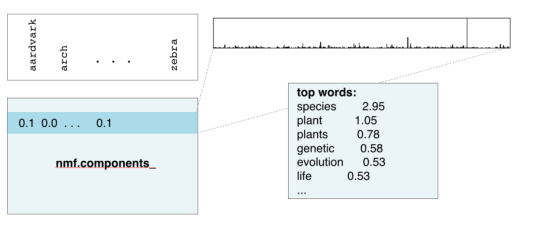

> The same happens if any other component is considered.



*So if NMF is applied to documents, then the components correspond to topics, and the NMF features reconstruct the documents from the topics.*

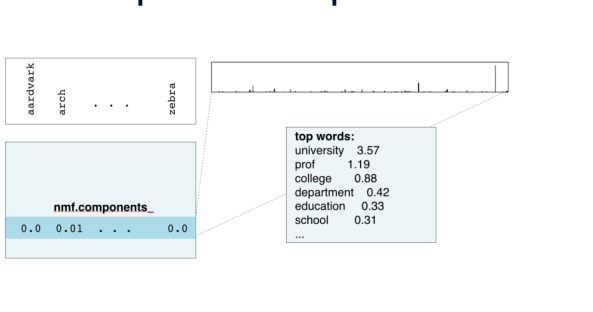

If NMF is applied to a collection of images, on the other hand, then the NMF components represent patterns that frequently occur in the images. In this example, for instance, NMF decomposes images from an LCD display into the individual cells of the display. 

* For documents:
  * NMF components represent topics
  * NMF features combine topics into documents
* For images, NMF components are parts of images

**Grayscale images** *image in which all the pixels are shades of gray ranging from black to white*

> Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. 

Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, the image can be represented as 2-dimensional array of numbers.

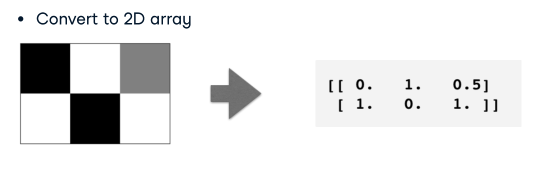

An 8x8 grayscale image of the moon, wri?en as an array


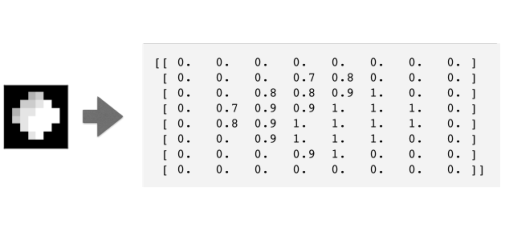

These 2-dimensional arrays of numbers can then be flattened by enumerating the entries. 

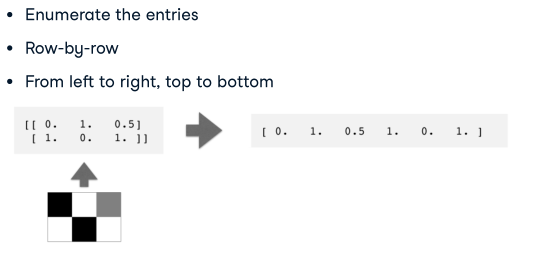

The grayscale image is now represented by a flat array of non-negative numbers.

**Encoding a collection of images**

A collection of grayscale images of the same size can thus be encoded as a 2-dimensional array, in which each row represents an image as a flattened array, and each column represents a pixel. 

> Viewing the images as samples, and the pixels as features, we see that the data is arranged similarly to the word frequency array.

Indeed, the entries of this array are non-negative, so NMF can be used to learn the parts of the images.

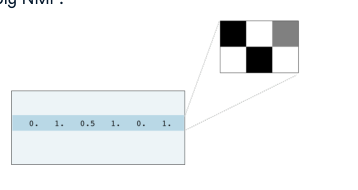

Visualizing samples

It's difficult to visualize an image by just looking at the flattened array. To recover the image, use the reshape method of the sample, specifying the dimensions of the original image as a tuple. 

```
print(sample)
[ 0. 1. 0.5 1. 0. 1. ]
bitmap = sample.reshape((2, 3))
print(bitmap)
[[ 0. 1. 0.5]
[ 1. 0. 1. ]]
```

This yields the 2-dimensional array of pixel brightnesses. To display the corresponding image, import pyplot, and pass the 2-dimensional array to the plt dot imshow function.

```
from matplotlib import pyplot as plt
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()
```

**NMF learns topics of documents**

You learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

* Import pandas as pd.
* Create a DataFrame components_df from model.components_, setting columns=words so that columns are labeled by the words.
* Print components_df.shape to check the dimensions of the DataFrame.
* Use the .iloc[] accessor on the DataFrame components_df to select row 3. Assign the result to component.
* Call the .nlargest() method of component, and print the result. This gives the five words with the highest values for that component.

```
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())
```
```
    (6, 13125)
    film       0.627877
    award      0.253131
    starred    0.245284
    role       0.211451
    actress    0.186398
    Name: 3, dtype: float64
```


**Explore the LED digits dataset**

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

* Import matplotlib.pyplot as plt.
* Select row 0 of samples and assign the result to digit. For example, to select column 2 of an array a, you could use a[:,2]. Remember that since samples is a NumPy array, you can't use the .loc[] or iloc[] accessors to select specific rows or columns.
* Print digit. This has been done for you. Notice that it is a 1D array of 0s and 1s.
* Use the .reshape() method of digit to get a 2D array with shape (13, 8). Assign the result to bitmap.
* Print bitmap, and notice that the 1s show the digit 7!
* Use the plt.imshow() function to display bitmap as an image.

```
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()
```

```
    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
     0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
     0. 0. 0. 0. 0. 0. 0. 0.]
    [[0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 1. 1. 1. 1. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]
```

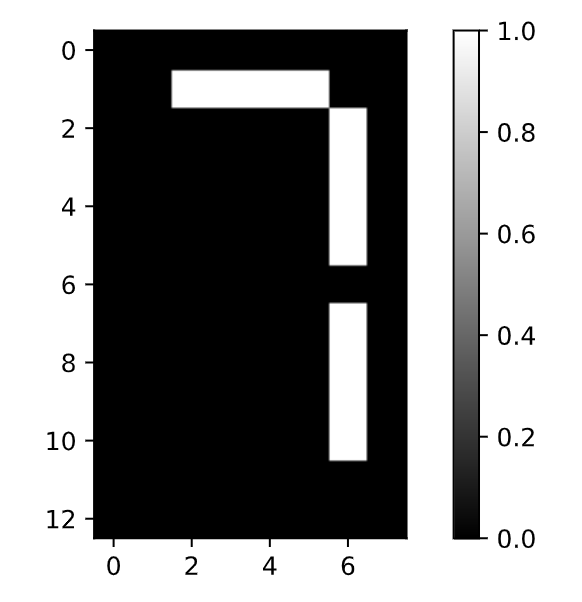

**NMF learns the parts of images**

Decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

```
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
```

* Import NMF from sklearn.decomposition.
* Create an NMF instance called model with 7 components. (7 is the number of cells in an LED display).
* Apply the .fit_transform() method of model to samples. Assign the result to features.
* To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.
* Assign the row 0 of features to digit_features.
* Print digit_features.

```
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)
```
```
    [4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
     4.81559442e-01 0.00000000e+00 7.37557191e-16]
```

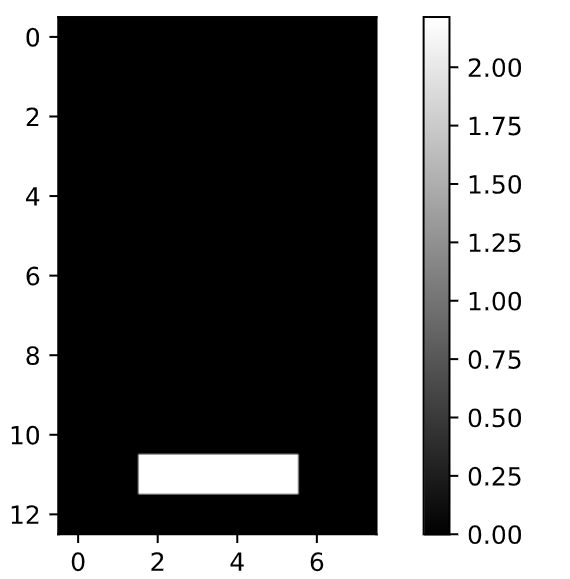

**PCA doesn't learn parts**

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images.

Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

* Import PCA from sklearn.decomposition.
* Create a PCA instance called model with 7 components.
* Apply the .fit_transform() method of model to samples. Assign the result to features.
* To each component of the model (accessed via model.components_), apply the show_as_image() function to that component inside the loop.

```
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    
```

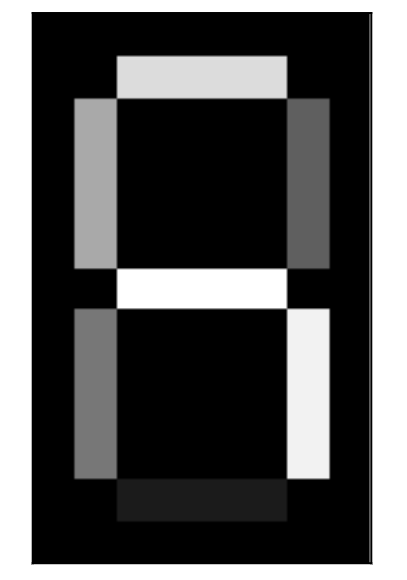

> Notice that the components of PCA do not represent meaningful parts of images of LED digits!


###Building recommender systems using NMF

